# Stock Forecasting using Darts Part 2

https://github.com/unit8co/darts

In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import NBEATSModel
from darts.metrics import mape
from darts.dataprocessing.transformers import Scaler

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
stock = 'AMD' # input
start = '2017-01-01' # input 
end = '2021-11-08'  # input
df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,11.42,11.65,11.02,11.43,11.43,55182000
2017-01-04,11.45,11.52,11.24,11.43,11.43,40781200
2017-01-05,11.43,11.69,11.23,11.24,11.24,38855200
2017-01-06,11.29,11.49,11.11,11.32,11.32,34453500
2017-01-09,11.37,11.64,11.31,11.49,11.49,37304800


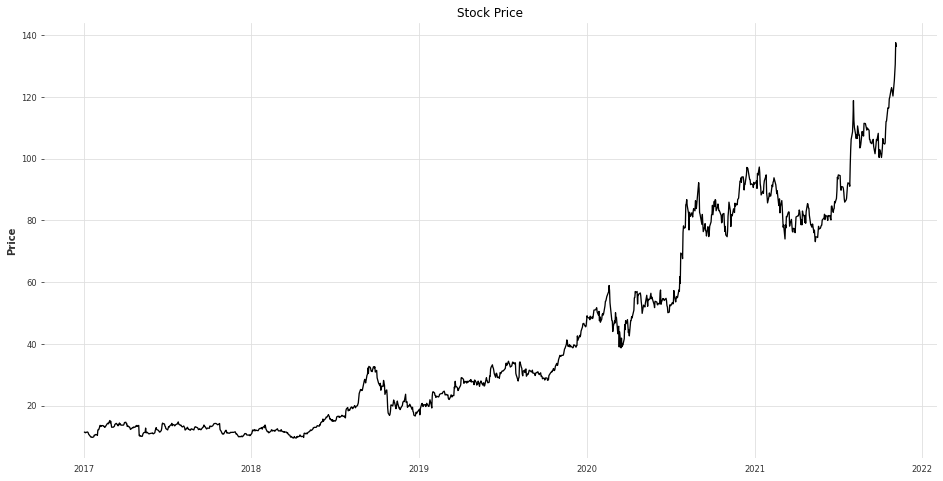

In [4]:
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'])
plt.title('Stock Price')
plt.ylabel('Price')
plt.show()

In [5]:
scaler_close = Scaler()

In [6]:
dfm = df.resample('M').mean()

In [7]:
dfm = dfm.reset_index()

In [8]:
series = TimeSeries.from_dataframe(dfm, 'Date', 'Adj Close')

In [9]:
series

<TimeSeries (DataArray) (Date: 59, component: 1, sample: 1)>
array([[[ 10.64899998]],

       [[ 13.50473685]],

       [[ 13.80217382]],

       [[ 13.29842116]],

       [[ 11.0513636 ]],

       [[ 12.4686363 ]],

       [[ 13.71899996]],

       [[ 12.693913  ]],

       [[ 12.78199997]],

       [[ 13.27909097]],

...

       [[ 88.67947428]],

       [[ 79.36652175]],

       [[ 81.84428624]],

       [[ 76.97599983]],

       [[ 83.33136333]],

       [[ 92.04666683]],

       [[108.79409096]],

       [[105.50666664]],

       [[112.38095238]],

       [[131.44599915]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2017-01-31 2017-02-28 ... 2021-11-30
  * component  (component) object 'Adj Close'
Dimensions without coordinates: sample

In [10]:
close = round(series,2)

In [11]:
close_scaled = scaler_close.fit_transform(series)

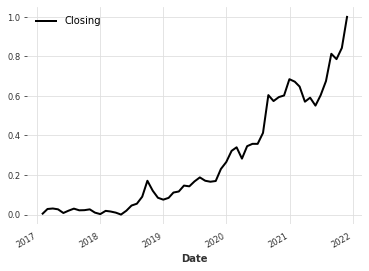

In [12]:
close_scaled.plot(label = "Closing")

In [13]:
close_series_train,  close_series_val = close_scaled[:-12], close_scaled[-12:]

In [14]:
type(close_series_train)

darts.timeseries.TimeSeries

In [15]:
model = NBEATSModel(input_chunk_length=24 , output_chunk_length=12, n_epochs = 100 , random_state = 15)

In [16]:
model.fit([close_series_train],verbose = True)

[2021-12-05 13:30:16,951] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 12 samples.
[2021-12-05 13:30:16,951] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 12 samples.
[2021-12-05 13:30:16,995] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2021-12-05 13:30:16,995] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


  0%|          | 0/100 [00:00<?, ?it/s]

In [17]:
pred = model.predict(n = 12, series = close_series_train)

In [18]:
print("Mape = {:.2f}%".format(mape(close_scaled, pred)))

Mape = 26.49%


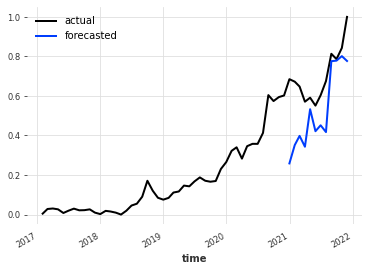

In [19]:
close_scaled.plot(label = "actual")
pred.plot(label = "forecasted") # validation data set
plt.legend()